In [14]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# seed 값 설정
seed = 42
numpy.random.seed(seed)
tf.random.set_seed(42)

In [17]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [18]:
# 정규화
X_train = X_train.reshape(X_train.shape[0],784).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0],784).astype('float32') /255

In [21]:
# 바이너리화 (one-hot encoding)
Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)

In [23]:
# 모델 생성(프레임 설정) , 은닉층 1개
model = Sequential()
model.add(Dense(512, input_dim=784, activation = 'relu'))  # input_dim : 28 by 28 = 784
# Sequential()모델은 변도의 입력층이 없음
# 대신, 첫번째 Dense layer에 input_dim이 존재
# 활성화 함수 : relu 사용
model.add(Dense(10, activation='softmax'))
# 출력결과가 10개 분류(0~9), 다중분류 : softmax

In [25]:
# 모델 실행 환경설정
model.compile(loss='categorical_crossentropy', # loss : cost function : 범주형 크로스엔트로피
              optimizer = 'adam',              # 최적화함수 : 'adam'
              metrics =['accuracy'])           # 측정지표 : 정확도

In [29]:
# 모델 최적화 설정
MODEL_DIR = './model' # 모델 디렉토리 생성(폴더)
if not os.path.exists(MODEL_DIR):     # 모델 디렉토리에 폴더가 없다면 폴더 없다면,
  os.mkdir(MODEL_DIR)                 # 폴더를 생성 (mkdir : make a directory)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5' # 모델 저장 경로 생성
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only =True)
# val_loss 를 monitoring 함(유의하게 본다는 의미)
# verboss : 결과 상황판, 성능이 나아진 것만 보기
early_stopping_callback=EarlyStopping(monitor='val_loss',patience = 10)
# val_loss 를 monitoring 함, 성능이 n번 이상 돌려서 나아지지 않으면 stop(조기종료)

In [30]:
# 모델실행 (학습 : 훈련용 데이터 셋으로 하세요)
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200,verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])
# 모델 학습 : fit , 훈련용 데이터로 함
# 검증 데이터(validation_data : 테스트 데이터 사용) 
# epochs : 반복횟수
# batch_size : 샘플 200개 추출
# verbose : 훈련 진행사항 실시간 표기
# callback : 조기종료, 성능개선 여부 확인

Epoch 1/30
291/300 [============================>.] - ETA: 0s - loss: 0.3028 - accuracy: 0.9154
Epoch 1: val_loss improved from inf to 0.15362, saving model to ./model/01-0.1536.hdf5
300/300 [==============================] - 4s 5ms/step - loss: 0.2984 - accuracy: 0.9165 - val_loss: 0.1536 - val_accuracy: 0.9547
Epoch 2/30
299/300 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 0.9644
Epoch 2: val_loss improved from 0.15362 to 0.10377, saving model to ./model/02-0.1038.hdf5
300/300 [==============================] - 1s 4ms/step - loss: 0.1241 - accuracy: 0.9644 - val_loss: 0.1038 - val_accuracy: 0.9688
Epoch 3/30
299/300 [============================>.] - ETA: 0s - loss: 0.0817 - accuracy: 0.9763
Epoch 3: val_loss improved from 0.10377 to 0.08187, saving model to ./model/03-0.0819.hdf5
300/300 [==============================] - 1s 4ms/step - loss: 0.0815 - accuracy: 0.9764 - val_loss: 0.0819 - val_accuracy: 0.9753
Epoch 4/30
287/300 [===========================>..

In [31]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f'%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.9835

 Test Accuracy: 0.9835


In [32]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [33]:
# 학습 셋의 오차
y_loss = history.history['loss']

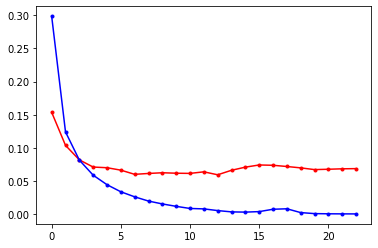

In [37]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue',label='Trainset_loss')

<function matplotlib.pyplot.show>

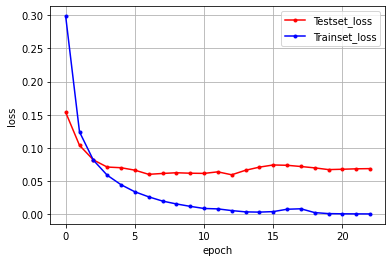

In [39]:
# 그래프로 표현 (tunnig)
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue',label='Trainset_loss')

# 격자무늬 추가, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show